In [1]:
import pandas as pd
import math
import numpy as np
import torch
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

/Users/admin/miniconda3/miniconda3/envs/ml/lib/python3.12/site-packages/threadpoolctl.py:1214: RuntimeWarning: 
Found Intel OpenMP ('libiomp') and LLVM OpenMP ('libomp') loaded at
the same time. Both libraries are known to be incompatible and this
can cause random crashes or deadlocks on Linux when loaded in the
same Python program.
Using threadpoolctl may cause crashes or deadlocks. For more
information and possible workarounds, please see
    https://github.com/joblib/threadpoolctl/blob/master/multiple_openmp.md

  warnings.warn(msg, RuntimeWarning)


In [2]:
!ls archive

CAR DETAILS FROM CAR DEKHO.csv car data.csv
Car details v3.csv             car details v4.csv


In [3]:
def getPath(path):
    BASE_PATH = "archive/"
    return BASE_PATH + path

In [4]:
orig_data = pd.read_csv(getPath("CAR DETAILS FROM CAR DEKHO.csv"))
data = orig_data

In [5]:
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [6]:
def min_max_scaling(value, min_value, max_value):
    return (value - min_value) / (max_value - min_value)

def reverse_min_max_scaling(scaled_value, min_value, max_value):
    return (scaled_value * (max_value - min_value)) + min_value

### Feature Engineering

In [7]:

## name - the variable name is not meaningful, excluded from training
data = data.drop(['name'], axis=1)

## year - Scaled using the min-max scaling. To preserve the relationship in the data.
data.year = min_max_scaling(data["year"], data["year"].min(), data["year"].max())

## selling_price - Scaling using min-max scaling
data.selling_price = min_max_scaling(data.selling_price, data.selling_price.min(), data.selling_price.max())


## km_driven - Scaling using z-score normalization
data.km_driven = min_max_scaling(data.km_driven, data.km_driven.min(), data.km_driven.max())

## fuel - One hot Encoding
data = pd.get_dummies(data, columns=['fuel'], dtype=int)


# seller_type - Randomly chosen One hot Encoding
data = pd.get_dummies(data, columns=['seller_type'], dtype=int)

## transmission - binary normalization
data.transmission = data.transmission.map({'Manual': 0, 'Automatic': 1})


## owner - ordinal relationship
data.owner = data.owner.map({'Test Drive Car': 0, 'First Owner': 1, 'Second Owner': 2, 'Third Owner': 3, 'Fourth & Above Owner': 4})

In [8]:
data

,year,selling_price,km_driven,transmission,owner,fuel_CNG,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer
0,0.535714,0.004505,0.086783,0,1,0,0,0,0,1,0,1,0
1,0.535714,0.012950,0.061988,0,1,0,0,0,0,1,0,1,0
2,0.714286,0.065315,0.123976,0,1,0,1,0,0,0,0,1,0
3,0.892857,0.025901,0.057028,0,1,0,0,0,0,1,0,1,0
4,0.785714,0.048423,0.174807,0,2,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4335,0.785714,0.043919,0.099181,0,2,0,1,0,0,0,0,1,0
4336,0.785714,0.043919,0.099181,0,2,0,1,0,0,0,0,1,0
4337,0.607143,0.010135,0.102900,0,2,0,0,0,0,1,0,1,0
4338,0.857143,0.095158,0.111579,0,1,0,1,0,0,0,0,1,0


### Analyzing Data

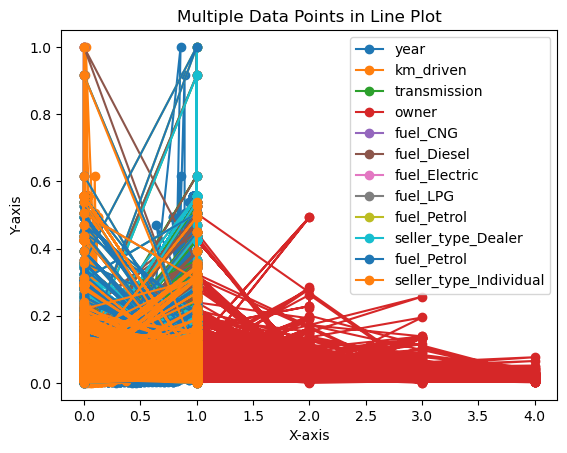

In [20]:

# Create a new figure
plt.figure()

plt.plot(data.year,data.selling_price, label='year', marker='o')
plt.plot(data.km_driven, data.selling_price, label='km_driven', marker='o')
plt.plot(data.transmission, data.selling_price, label='transmission', marker='o')
plt.plot(data.owner,data.selling_price, label='owner', marker='o')
plt.plot(data.fuel_CNG,data.selling_price, label='fuel_CNG', marker='o')
plt.plot(data.fuel_Diesel,data.selling_price, label='fuel_Diesel', marker='o')
plt.plot(data.fuel_Electric,data.selling_price, label='fuel_Electric', marker='o')
plt.plot(data.fuel_LPG,data.selling_price, label='fuel_LPG', marker='o')
plt.plot(data.fuel_Petrol,data.selling_price, label='fuel_Petrol', marker='o')
plt.plot(data.seller_type_Dealer,data.selling_price, label='seller_type_Dealer', marker='o')
plt.plot(data.fuel_Petrol,data.selling_price, label='fuel_Petrol', marker='o')
plt.plot(data.seller_type_Individual,data.selling_price, label='seller_type_Individual', marker='o')

# Add title and labels
plt.title('Multiple Data Points in Line Plot')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')

# Add a legend
plt.legend()

# Display the plot
plt.show()


### Splitting the dataset

In [ ]:
X = data.drop(columns=['selling_price'])
y = data['selling_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = LinearRegression()

model.fit(X_train, y_train)

### Train Model

In [ ]:
#### TODO: Test everyting below


# # Predict the target variable (y) using the test set
# y_pred = model.predict(X_test)

# # Evaluate the model
# mse = mean_squared_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)

# print("Mean Squared Error:", mse)
# print("R-squared:", r2)

### Evaluate

In [ ]:
def evaluate():
    # global y_test
    y_pred = model.predict(X_test)
    y_test_local = y_test.to_numpy()
    
    # reverse min-max sclaing
    y_pred = reverse_min_max_scaling(y_pred, orig_data.selling_price.min(), orig_data.selling_price.max())
    y_test_local = reverse_min_max_scaling(y_test_local, orig_data.selling_price.min(), orig_data.selling_price.max())
    
    df = pd.DataFrame({ 'y_pred': y_pred, 'y_test': y_test_local, 'diff': y_pred - y_test_local  })
    
    mse = mean_squared_error(y_test_local, y_pred)
    r2 = r2_score(y_test_local, y_pred)
    
    print("Mean Squared Error:", mse)
    print("R-squared:", r2)
    print(df)

evaluate()

In [ ]:
def test():
    value = 42
    scaled = min_max_scaling(value, 100, 200)
    rev_scaled = reverse_min_max_scaling(scaled, 100, 200)
    print("scaled", scaled)
    print("rev_scaled", rev_scaled)
test()

### Draw Useful Charts